# One dimensional signals 
    
Signals described to be the functions with various numbers of independent variables. The number of these variables defines the signal dimension. In particular 1 dimensional signals (1D) defined by the one independent variable in a function, typically over time domain x(t). 

The examples of a 1D signal could be an audio signal(music, speech, sound), a voltage signal in a circuit, or the speed of a car. 

The signals may be of two basic types: Continuous and Discrete. 

Majority of natural based signals are continuous in their nature however for them to be properly processed the signals have to be discretized, meaning transformed from continuous representation into discrete. This process is called sampling.  
    
Alan Oppenheim, Signals and Systems (1996)
1. 1 CONTINUOUS-TIME AND DISCRETE-TIME SIGNALS
1 . 1 . 1 Examples and Mathematical Representation


# Nyquist Theorem

# Intro to a goal that we are trying to achieve

Import the necessary libraries for work.

In [38]:
import numpy as np
import matplotlib.pyplot as plt

Determine time step and time range variables.

In [39]:
dt = 0.001
t = np.arange(0,1, dt)

# Plotting original sine waves

Plot the sine wave of periodicity of 10 Hz and 50 Hz.

In [40]:
freq1 = 10
freq2 = 50

Implement a handy way to represnt multiple plots at once:

In [41]:
def multiPlot(*f: object) -> object:
    l = len(f)
    fig, axs = plt.subplots(l, 1)

    for i in f:
        l = l-1
        plt.sca(axs[l])
        plt.plot(t, i[0], color='navy', linewidth=1, label=i[1], )
        plt.xlim(t[0], t[-1])
        plt.ylabel(i[1])
        plt.legend()

    plt.show()

#### Sine waves 
Plot actually the necessary stochastic signals and their sum

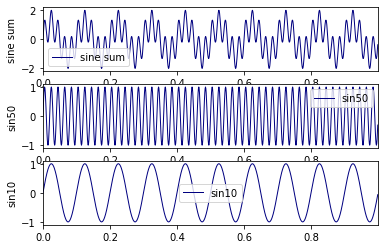

In [42]:
def functFreq10():
    return np.sin(2 * np.pi * freq1 * t), 'sin10'


def functFreq50():
    return np.sin(2 * np.pi * freq2 * t), 'sin50'


def functSumClean():
    return functFreq10()[0] + functFreq50()[0], 'sine sum'

multiPlot(functFreq10(), functFreq50(), functSumClean())

#### Gaussian Noise
Then the Gaussian noise is added to the summarized signal `sineSum` in order to get a distorted signal.

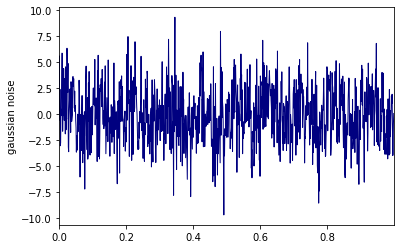

In [49]:
def functSumNoise():
    f = functSumClean()[0]
    f += 2.5 * np.random.randn(len(t))
    return  f, 'gaussian noise'

def singlePlot(f):
    plt.plot(t, f[0], color='navy', linewidth=1, label=f[1], )
    plt.xlim(t[0], t[-1])
    plt.ylabel(f[1])
    plt.show()

singlePlot(functSumNoise())

This noise then will be attempted to be filtered out and restored to it's original denoised state. 

# Fast Fourier Transform (FFT)

To be able to generate Fourier Series from a finite range the Discrete Fourier Transformation algorithm should be used. In order to process large data sets in a more efficient generaly used a Fast Fourier Algorithm.

Let's generate a Fourier series from the distorted signal `signalNoise` 
using the python method for Fast Fourier Transform.

And confirm that the Fourier Series indeed were generated by examining the first 10 results from the variable **fftSignalNoise**

In [50]:
fftSignalNoise = np.fft.fft(functSumNoise()[0], len(t))

i = 0
for line in fftSignalNoise:
    if (10 == i):
        break
    print(line)
    i += 1

(-63.89253007566447+0j)
(-45.323568329325134-8.476492732862297j)
(-95.86222742015724-82.52034812784444j)
(-102.38022721883664-40.56740672026346j)
(90.32174772606486-62.87951053844049j)
(-22.900041259386782-86.41134838198317j)
(-72.41786380087007-29.190159120603397j)
(-47.666220644648746+45.29551001927666j)
(15.720430613517081+53.711949711231135j)
(41.42616570379092+70.76224774226361j)


# Power Spectrum Density

There's a need to calculate a **spectral density** which is a represenation of power(intensity) of a given function at frequency domain for the given interval between **w** and **w + delta w**



In [ ]:
interval = len(t)

spectrum = fftSignalNoise * np.conj(fftSignalNoise)/interval
frequencies = (1/(dt*interval))* np.arange(interval)

L = np.arange(1, np.floor(interval/2), dtype='int')

plt.plot(frequencies[L], np.real(spectrum[L]), label='Power Spectral Density')
plt.xlim(frequencies[L[0]], frequencies[L[-1]])
plt.legend()
plt.show()

In [ ]:
# Filtering the Power Spectral Denstiy Values